In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df_test = pd.read_csv("drive/MyDrive/Colab Notebooks/PyTorch_Lesson6/test.csv")
df_train = pd.read_csv("drive/MyDrive/Colab Notebooks/PyTorch_Lesson6/train.csv")

In [4]:
df_train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train[['id', 'tweet']], df_train['label'], test_size=0.33, random_state=42)

In [6]:
df_train = X_train
df_train['label'] = y_train
df_train

,id,tweet,label
18780,18781,bbc news - russia lake syamozero: children die...,0
18475,18476,@user is going to get sick of my face! #firebr...,0
15842,15843,can't wait until tomorrow night! #weekend #sum...,0
22997,22998,we are so for the 2nd annual bailey day tast...,0
3560,3561,i got addicted. moonblue was my name ...took ...,0
...,...,...,...
29802,29803,#waltdisneyreso should be ashamed of themselv...,0
5390,5391,@user invited @user over for a catch up and i...,0
860,861,black professor makes assumptions about an ent...,1
15795,15796,#lgbtqhatetrumppay is total #liberal trash. it...,0


In [7]:
df_val = X_val
df_val['label'] = y_val
df_val

,id,tweet,label
12227,12228,@user âmy mom says my smile is captivatingâ...,0
14709,14710,"in 3 days i will be meeting my sis-n-law, coun...",0
19319,19320,hating the conservative homophobes using this ...,0
4308,4309,awee if this doesn't #scream #friday #acewe...,0
24055,24056,fathersday #fatherÃ¢ÂÂs #day #god! #ÃÂ« #...,0
...,...,...,...
16235,16236,wonder if dt is still demanding the rnc to boo...,0
31460,31461,you might be a libtard if... #libtard #sjw #l...,1
1760,1761,"this #newyearseve,may our #resolutions b 2 end...",1
24683,24684,congrats on the hard work!!,0


In [8]:
#!pip install stop-words pymorphy2
#!pip install nltk

from nltk.tokenize import word_tokenize

In [9]:
import re

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
puncts = {'!', '"', '#','$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.',
'/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{',
'|', '}', '~'}

In [12]:
def preprocess_text(txt):
    txt = re.sub(r'@\w+ ', "", txt)
    txt = str(word_tokenize(txt))
    txt = txt.lower()
    # txt = [morpher.parse(word)[0].normal_form for word in txt.split() if word not in sw]
    txt = "".join(c for c in txt if c not in puncts)
    return txt

In [13]:
df_train['tweet'].iloc[:1].apply(preprocess_text).values

array(['bbc news  russia lake syamozero  children die after storm catches boating group  poorkids'],
      dtype=object)

In [14]:
from tqdm import tqdm 
tqdm.pandas()

df_train['tweet'] = df_train['tweet'].progress_apply(preprocess_text)
df_val['tweet'] = df_val['tweet'].progress_apply(preprocess_text)

100%|██████████| 10548/10548 [00:02<00:00, 3836.42it/s]


In [15]:
train_corpus = " ".join(df_train["tweet"])
train_corpus = train_corpus.lower()

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt")

tokens = word_tokenize(train_corpus)
tokens[:5]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['bbc', 'news', 'russia', 'lake', 'syamozero']

In [17]:
tokens_filtered = [word for word in tokens if word.isalnum()]

In [18]:
from nltk.probability import FreqDist

max_words = 2000

dist = FreqDist(tokens_filtered)
tokens_filtered_top = [pair[0] for pair in dist.most_common(max_words-1)]  # вычитание 1 для padding
len(tokens_filtered_top)

1999

In [19]:
tokens_filtered_top[:10]

['the', 'to', 'i', 'a', 'you', 'and', 'in', 'for', 'is', 'of']

In [20]:
vocabulary = {v: k for k, v in dict(enumerate(tokens_filtered_top, 1)).items()}
vocabulary

{'the': 1,
 'to': 2,
 'i': 3,
 'a': 4,
 'you': 5,
 'and': 6,
 'in': 7,
 'for': 8,
 'is': 9,
 'of': 10,
 'my': 11,
 'it': 12,
 's': 13,
 'love': 14,
 'on': 15,
 'this': 16,
 'with': 17,
 'be': 18,
 'nt': 19,
 'day': 20,
 'that': 21,
 'so': 22,
 'all': 23,
 'are': 24,
 'me': 25,
 'do': 26,
 'amp': 27,
 'happy': 28,
 'your': 29,
 'have': 30,
 'at': 31,
 'we': 32,
 'just': 33,
 'when': 34,
 'not': 35,
 'will': 36,
 'am': 37,
 'u': 38,
 'what': 39,
 'time': 40,
 'life': 41,
 'today': 42,
 'but': 43,
 'from': 44,
 'm': 45,
 'like': 46,
 'up': 47,
 'new': 48,
 'thankful': 49,
 'positive': 50,
 'was': 51,
 'now': 52,
 'out': 53,
 'as': 54,
 'get': 55,
 'how': 56,
 'by': 57,
 'people': 58,
 'good': 59,
 'our': 60,
 'bihday': 61,
 'about': 62,
 'no': 63,
 'they': 64,
 'one': 65,
 'ca': 66,
 'see': 67,
 'can': 68,
 'more': 69,
 'if': 70,
 'smile': 71,
 'go': 72,
 'who': 73,
 'want': 74,
 'work': 75,
 'take': 76,
 'has': 77,
 'healthy': 78,
 'he': 79,
 'user': 80,
 'father': 81,
 'weekend': 82,
 '

In [21]:
import numpy as np


def text_to_sequence(text, maxlen):
    result = []
    tokens = word_tokenize(text.lower())
    tokens_filtered = [word for word in tokens if word.isalnum()]
    for word in tokens_filtered:
        if word in vocabulary:
            result.append(vocabulary[word])

    padding = [0] * (maxlen-len(result))
    return result[-maxlen:] + padding

In [22]:
max_len = 20

x_train = np.asarray([text_to_sequence(text, max_len) for text in df_train["tweet"]])
x_val = np.asarray([text_to_sequence(text, max_len) for text in df_val["tweet"]])

In [23]:
x_train.shape

(21414, 20)

In [24]:
df_train['tweet'].iloc[3]

'we are so for the 2nd annual bailey day taste off   join us for  familyfun  baileyday2016  mountainliving'

In [25]:
x_train[3]

array([  32,   24,   22,    8,    1,  704, 1937,   20,  134,  565,   91,
          8,    0,    0,    0,    0,    0,    0,    0,    0])

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class RNNFixedLen(nn.Module) :
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, use_last=True):
        super().__init__()
        self.use_last = use_last
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)

        rnn_out, ht = self.rnn(x) 
        # rnn_out: тензор с выходными фичами с последнего слоя для каждого t
        # h_t: тензор с последними скрытыми состояниями по слоям

        if self.use_last:
            last_tensor = rnn_out[:,-1,:]
        else:
            # use mean
            last_tensor = torch.mean(rnn_out[:,:], dim=1)
    
        out = self.linear(last_tensor)
        
        return torch.sigmoid(out)

In [27]:
rnn_init = RNNFixedLen(max_words, 128, 20, use_last=False)
optimizer = torch.optim.Adam(rnn_init.parameters(), lr=0.001)
criterion = nn.BCELoss()

In [28]:
print(rnn_init)
print("Parameters:", sum([param.nelement() for param in rnn_init.parameters()]))

RNNFixedLen(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (rnn): RNN(128, 20, num_layers=2, batch_first=True)
  (linear): Linear(in_features=20, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Parameters: 259861


In [29]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
rnn_init.to(device)
device

'cpu'

In [31]:
from torch.utils.data import DataLoader, Dataset


class DataWrapper(Dataset):
    def __init__(self, data, target = '', transform=None):
        self.data = torch.from_numpy(data).long()
        if target != '':
          self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        if self.target != '':
          y = self.target[index]
  
        if self.transform:
            x = self.transform(x)
        if self.target != '':
          return x, y
        else: return x
    
    def __len__(self):
        return len(self.data)

In [32]:
batch_size = 512

train_dataset = DataWrapper(x_train, df_train['label'].values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = DataWrapper(x_val, df_val['label'].values)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


In [33]:
train_loader

In [34]:
for x, l in train_loader:
    print(x.shape)
    print(l.shape)
    print(l[0])
    break

torch.Size([512, 20])
torch.Size([512])
tensor(1)


In [36]:
model = RNNFixedLen(vocab_size=max_words)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

In [37]:
print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

RNNFixedLen(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (rnn): RNN(128, 128, num_layers=2, batch_first=True)
  (linear): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
Parameters: 322177


In [38]:
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [39]:
# Training
epochs = 5
print_batch_n = 100

In [40]:
rnn_init = rnn_init.to(device)
rnn_init.train()
th = 0.5

train_loss_history = []
test_loss_history = []


for epoch in range(epochs):  
    rnn_init.train()
    running_items, running_right = 0.0, 0.0
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)

        # обнуляем градиент
        optimizer.zero_grad()
        outputs = rnn_init(inputs)
        
        loss = criterion(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        # подсчет ошибки на обучении
        loss = loss.item()
        running_items += len(labels)
        # подсчет метрики на обучении
        pred_labels = torch.squeeze((outputs > th).int())
        running_right += (labels == pred_labels).sum()
        
    # выводим статистику о процессе обучения
    rnn_init.eval()
    
    print(f'Epoch [{epoch + 1}/{epochs}]. ' \
          f'Step [{i + 1}/{len(train_loader)}]. ' \
          f'Loss: {loss:.3f}. ' \
          f'Acc: {running_right / running_items:.3f}', end='. ')
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    train_loss_history.append(loss)

    # выводим статистику на тестовых данных
    test_running_right, test_running_total, test_loss = 0.0, 0.0, 0.0
    for j, data in enumerate(val_loader):
        test_labels = data[1].to(device)
        test_outputs = rnn_init(data[0].to(device))
        
        # подсчет ошибки на тесте
        test_loss = criterion(test_outputs, test_labels.float().view(-1, 1))
        # подсчет метрики на тесте
        test_running_total += len(data[1])
        pred_test_labels = torch.squeeze((test_outputs > th).int())
        test_running_right += (test_labels == pred_test_labels).sum()
    
    test_loss_history.append(test_loss.item())
    print(f'Test loss: {test_loss:.3f}. Test acc: {test_running_right / test_running_total:.3f}')
        
print('Training is finished!')

Epoch [1/5]. Step [42/42]. Loss: 0.656. Acc: 0.921. Test loss: 0.665. Test acc: 0.922
Epoch [2/5]. Step [42/42]. Loss: 0.659. Acc: 0.919. Test loss: 0.657. Test acc: 0.922
Epoch [3/5]. Step [42/42]. Loss: 0.658. Acc: 0.920. Test loss: 0.651. Test acc: 0.922
Epoch [4/5]. Step [42/42]. Loss: 0.655. Acc: 0.919. Test loss: 0.646. Test acc: 0.922
Epoch [5/5]. Step [42/42]. Loss: 0.658. Acc: 0.919. Test loss: 0.673. Test acc: 0.922
Training is finished!


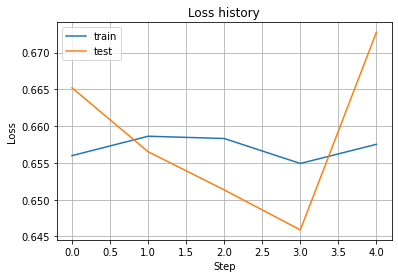

In [41]:
import matplotlib.pyplot as plt

plt.title('Loss history')
plt.grid(True)
plt.ylabel('Loss')
plt.xlabel('Step')
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.legend();

# Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

Добрый день!

В этот раз получилась та же ситуация, что и с моим шестым заданием. Спасибо большое за комментарий к нему!

Надеюсь, успею поправить код до того, как Вы начнёте проверять моё дз :)